In [1]:
## Bring in needed ods
import pandas as pd, numpy as np, scipy.stats as ss
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
## Load phentype data
data_mel = 'C:/Users/Thomas/Documents/MELANIN/Melanin_Phenotypes.csv'
ph = pd.read_csv(data_mel)

ph.rename(columns = {"Strain" : "Sample"}, inplace = True)

ph.head()

,Sample,Mean_intensity,QTL14
0,SS-B307,12310.311000,1
1,SS-B310,12255.142667,1
2,SS-B311,14045.272333,1
3,SS-B312,18635.336333,0
4,SS-B313,16597.829333,0


In [41]:
data_meb = '../../PHENOTYPE/XL280x431/XL280x431_cross_amoeba_roth_processed_01_26_2021.csv'

meba = pd.read_csv(data_meb)

meba.drop(['Unnamed: 0', 'plate', 'Stack', 'passage', 'Area.1'], axis = 1, inplace = True)

rep2 = meba.loc[meba.Replicate == 2].index

meba_mn = meba[~meba.index.isin(rep2)].groupby('Sample').mean().sort_values('Area.12')

meba_mn.head()

,Replicate,Area.12
Sample,,
SS-B580,3.0,0.006452
B896,3.0,0.522580
SS-C029_cor,3.0,0.980643
SS-B598,3.0,1.193546
SS-B570,2.0,1.309675


In [42]:
pheno = pd.merge(meba_mn, ph, on = 'Sample')

pheno.rename(columns = {"QTL14" : "GT", "Area.12": "Colony", "Mean_intensity": "Melanin"}, inplace = True)

pheno

,Sample,Replicate,Colony,Melanin,GT
0,SS-B580,3.0,0.006452,17591.315667,0
1,SS-C029_cor,3.0,0.980643,18354.263000,0
2,SS-B598,3.0,1.193546,17153.944667,0
3,SS-B570,2.0,1.309675,17781.052000,0
4,SS-B874,2.0,1.822577,18053.505667,0
...,...,...,...,...,...
99,SS-B350,1.0,36.438637,12222.976333,1
100,SS-B358,2.0,38.796697,13197.207333,1
101,SS-B317,2.0,38.932180,8562.591000,1
102,SS-B369,2.0,48.593451,15529.797667,0


In [43]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [44]:
myylabel = 'Amoeba clearance area (cm$^2$)\n$\longleftarrow$resistant - sensitive$\longrightarrow$'

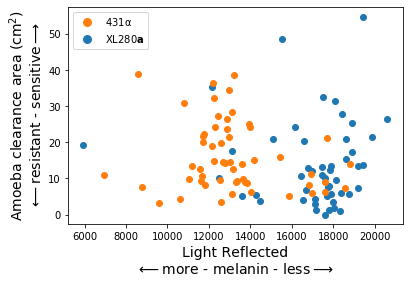

In [45]:
legend_elements = [Line2D([0], [0], marker='o', color='w', label='431'+r'$\mathrm{\alpha}$',
                          markerfacecolor='tab:orange', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='XL280' +r'$\bf{a}$',
                          markerfacecolor='tab:blue', markersize=10)] # for making a custom legend

colors = {'0':'blue','1':'tab:orange'}

groups = pheno.groupby('GT')

fig, ax = plt.subplots(1,1,figsize=(6,4))

for i,j in groups:
    ax.plot(j.Melanin, j.Colony, marker = 'o', linestyle='', label=i)
ax.legend()


#x_line = np.arange(min(x), max(x))

#y_line = objective(x_line, a, b, c)

ax.legend(handles=legend_elements, loc='upper left')
plt.xlabel('Light Reflected\n$\longleftarrow$more - melanin - less$\longrightarrow$',fontsize=14) ## Add x label.
plt.ylabel(myylabel,fontsize=14); ## add y label
#plt.plot(x_line, y_line, '--', color='red')

plt.savefig("C:/Users/Thomas/Pictures/scientific figures/Melanin_Amoeba_correlation_XL280x431.png", 
            dpi = 100, bbox_inches = "tight")

In [46]:
pheno.to_csv('../../PHENOTYPE/AMOEBA/HALOS/XL280x431_halo_mel_pehno.csv', index = False)